In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf
import scipy.constants as sc

Stolt插值：变量代换

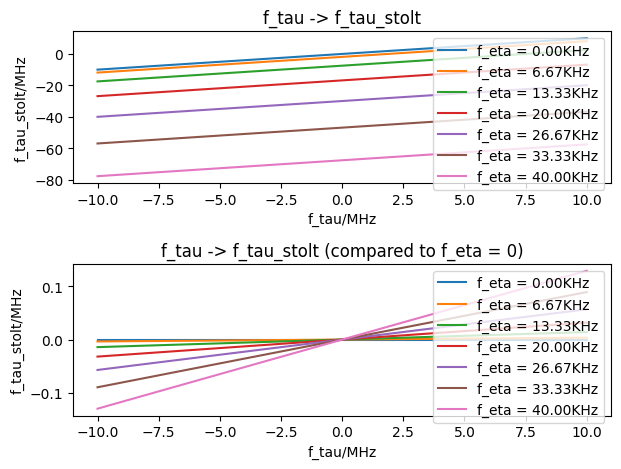

In [3]:
Vr = 7100
f0 = 5.3e+9

N1 = 7
N2 = 100
f_eta = np.linspace(0,40,N1)*1e+3
f_tau = np.linspace(-10,10,N2)*1e+6

f_eta = f_eta.reshape(len(f_eta),1)
f_tau = f_tau.reshape(1,len(f_tau))
f_tau_stolt = np.sqrt((f0+f_tau)**2 - (sc.c*f_eta)**2/(4*Vr**2)) - f0

plt.figure()
plt.subplot(2,1,1)
for i in range(N1):
    plt.plot(f_tau[0,:]*1e-6, f_tau_stolt[i,:]*1e-6, label = f'f_eta = {f_eta[i,0]*1e-3:.2f}KHz')
plt.legend()
plt.xlabel('f_tau/MHz')
plt.ylabel('f_tau_stolt/MHz')
plt.title('f_tau -> f_tau_stolt')

plt.subplot(2,1,2)
for i in range(N1):
    f_tau_0 = np.sqrt((f0)**2 - (sc.c*f_eta[i])**2/(4*Vr**2)) - f0

    plt.plot(f_tau[0,:]*1e-6, (f_tau_stolt[i,:] - f_tau_stolt[0,:] - f_tau_0)*1e-6, label = f'f_eta = {f_eta[i,0]*1e-3:.2f}KHz')
plt.legend()
plt.xlabel('f_tau/MHz')
plt.ylabel('f_tau_stolt/MHz')
plt.title('f_tau -> f_tau_stolt (compared to f_eta = 0)')
plt.tight_layout()
plt.show()


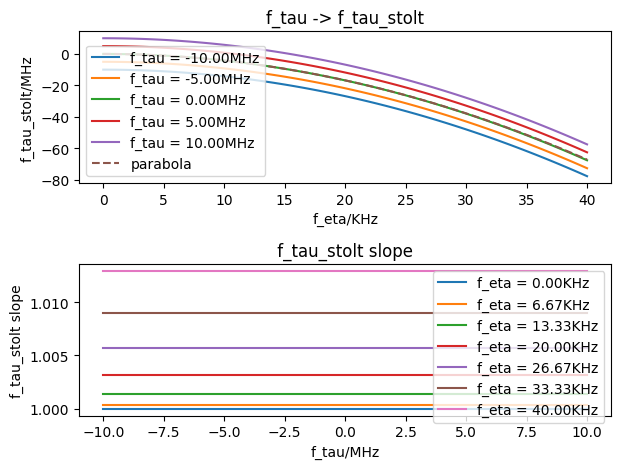

In [4]:
Vr = 7100
f0 = 5.3e+9



plt.figure()
plt.subplot(2,1,1)
N1 = 100
N2 = 5
f_eta = np.linspace(0,40,N1)*1e+3
f_tau = np.linspace(-10,10,N2)*1e+6

f_eta = f_eta.reshape(len(f_eta),1)
f_tau = f_tau.reshape(1,len(f_tau))
f_tau_stolt = np.sqrt((f0+f_tau)**2 - (sc.c*f_eta)**2/(4*Vr**2)) - f0
f_tau_parabola = - (sc.c*f_eta)**2/(8*Vr**2*f0)
for i in range(N2):
    plt.plot(f_eta[:,0]*1e-3, f_tau_stolt[:,i]*1e-6, label = f'f_tau = {f_tau[0,i]*1e-6:.2f}MHz')
plt.plot(f_eta[:,0]*1e-3,f_tau_parabola*1e-6,'--',label = 'parabola')
plt.legend()
plt.xlabel('f_eta/KHz')
plt.ylabel('f_tau_stolt/MHz')
plt.title('f_tau -> f_tau_stolt')

plt.subplot(2,1,2)
N1 = 7
N2 = 100
f_eta = np.linspace(0,40,N1)*1e+3
f_tau = np.linspace(-10,10,N2)*1e+6

f_eta = f_eta.reshape(len(f_eta),1)
f_tau = f_tau.reshape(1,len(f_tau))
f_tau_stolt = np.sqrt((f0+f_tau)**2 - (sc.c*f_eta)**2/(4*Vr**2)) - f0
for i in range(N1):
    slope = (f_tau_stolt[i,-1]-f_tau_stolt[i,0])/(f_tau[0,-1]-f_tau[0,0])*np.ones_like(f_tau[0,:])
    plt.plot(f_tau[0,:]*1e-6, slope, label = f'f_eta = {f_eta[i,0]*1e-3:.2f}KHz')
plt.legend()
plt.xlabel('f_tau/MHz')
plt.ylabel('f_tau_stolt slope')
plt.title(' f_tau_stolt slope ')
plt.tight_layout()
plt.show()
